In [83]:
from matplotlib import cbook
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

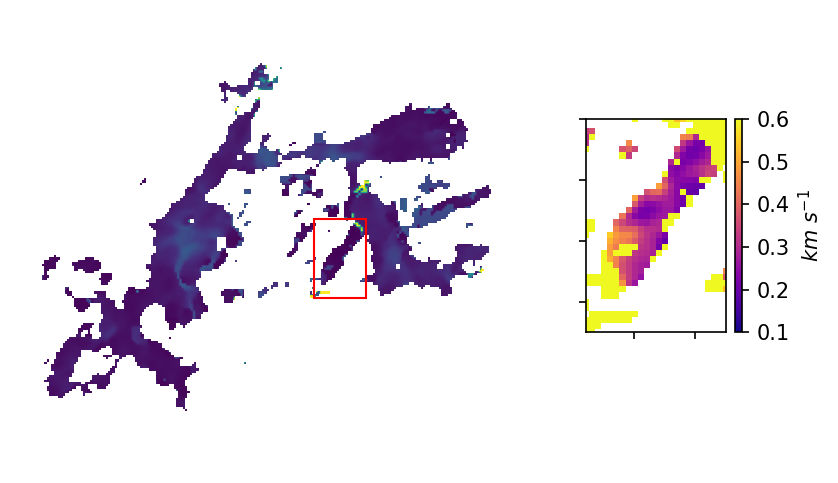

In [295]:
fp = '/Users/josh/GitHub/W51/'
fig, ax = plt.subplots(figsize=[8, 4], dpi=150, frameon=False)

par_map = fits.open(fp+'/data/par_maps.fits')
lw = par_map[0].data[3]

ax.imshow(lw, origin="lower")
ax.set_xlim(50,275)
ax.set_ylim(50,250)
ax.axis('off')
# inset axes....
#axins = ax.inset_axes([0.5, 0.3, 1.55, 0.47])
axins = ax.inset_axes([0.5, 0.3, 0.85, 0.47])
axins.imshow(lw, origin="lower", vmin=0.1, vmax=0.6, cmap='plasma')
# sub region of the original image
x1, x2, y1, y2 = 182, 205, 125, 160
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins, edgecolor='red', alpha=1)
divider = make_axes_locatable(axins)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(axins.imshow(lw, origin="lower", vmin=0.1, vmax=0.6, cmap='plasma'), cax=cax, label=r'$km$ $s^{-1}$')
#plt.show()
plt.savefig('/Users/josh/GitHub/W51/fig_products/narrow_line_insert.pdf', bbox_inches='tight')

In [216]:
mask = np.zeros(shape=(300,300))
mask[131:159, 185:205] = 1
mask[150:159, 185:194] = 0
mask[131:140, 196:205] = 0

(125.0, 160.0)

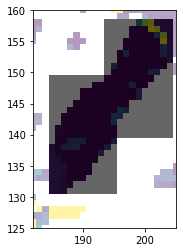

In [217]:
plt.imshow(lw, origin='lower')
plt.imshow(mask, origin='lower', alpha=0.6, cmap='binary')
plt.xlim(182,205)
plt.ylim(y1,y2)

In [241]:
mask = mask > 0

In [253]:
np.linspace(0, 80, 9)

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.])

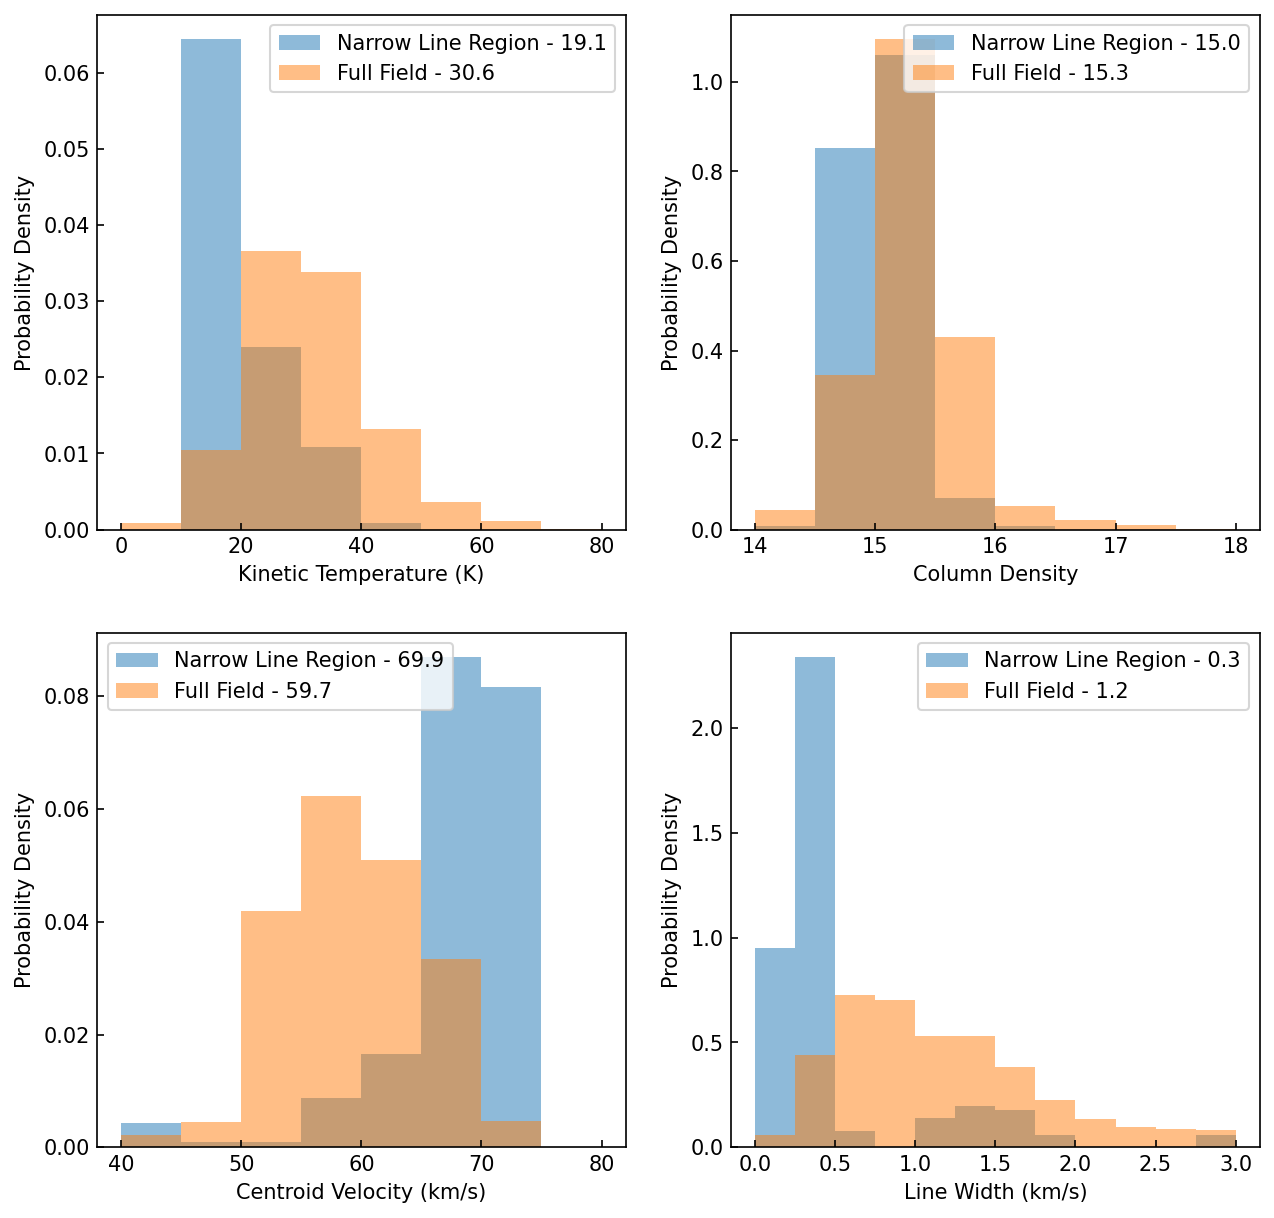

In [299]:
fig, ax = plt.subplots(2,2, figsize=(10,10), dpi=150)


## TKIN ###
bins = np.linspace(0,80,9)
data = par_map[0].data[0][mask]
data = data[np.isfinite(data)]
ax[0,0].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[0,0].hist(par_map[0].data[0][np.isfinite(par_map[0].data[0])], bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(par_map[0].data[0]),1)))
ax[0,0].set_xlabel('Kinetic Temperature (K)')
ax[0,0].set_ylabel('Probability Density')
ax[0,0].tick_params(direction='in', which='both')
ax[0,0].legend()

## COLUMN DENSITY ###
bins = np.linspace(14,18,9)
data = par_map[0].data[2][mask]
data = data[np.isfinite(data)]
ax[0,1].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[0,1].hist(par_map[0].data[2][np.isfinite(par_map[0].data[2])], bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(par_map[0].data[2]),1)))
ax[0,1].set_xlabel('Column Density')
ax[0,1].set_ylabel('Probability Density')
ax[0,1].tick_params(direction='in', which='both')
ax[0,1].legend()

## VELOCITY (CENTROID) ###
bins = np.linspace(40,80,9)
data = par_map[0].data[4][mask]
data = data[np.isfinite(data)]
ax[1,0].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[1,0].hist(par_map[0].data[4][np.isfinite(par_map[0].data[4])], bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(par_map[0].data[4]),1)))
ax[1,0].set_xlabel('Centroid Velocity (km/s)')
ax[1,0].set_ylabel('Probability Density')
ax[1,0].tick_params(direction='in', which='both')
ax[1,0].legend()

## LINE WIDTH ###
bins = np.linspace(0,3,13)
data = par_map[0].data[3][mask]
data = data[np.isfinite(data)]
ax[1,1].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[1,1].hist(par_map[0].data[3][np.isfinite(par_map[0].data[3])], bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(par_map[0].data[3]),1)))
ax[1,1].set_xlabel('Line Width (km/s)')
ax[1,1].set_ylabel('Probability Density')
ax[1,1].tick_params(direction='in', which='both')
ax[1,1].legend()

plt.savefig('/Users/josh/GitHub/W51/fig_products/narrow_line_4panel_stats.pdf', bbox_inches='tight')

In [228]:
z = mask*True

In [231]:
z = mask > 0

In [301]:
full_field = par_map[0].data[0][np.isfinite(par_map[0].data[0])]

In [321]:
ff = par_map[0].data[0][z == False]

In [323]:
ff[np.isfinite(ff)]

array([16.35447191, 17.75607522, 18.73625715, ..., 40.04610167,
       37.0974872 , 32.87914093])

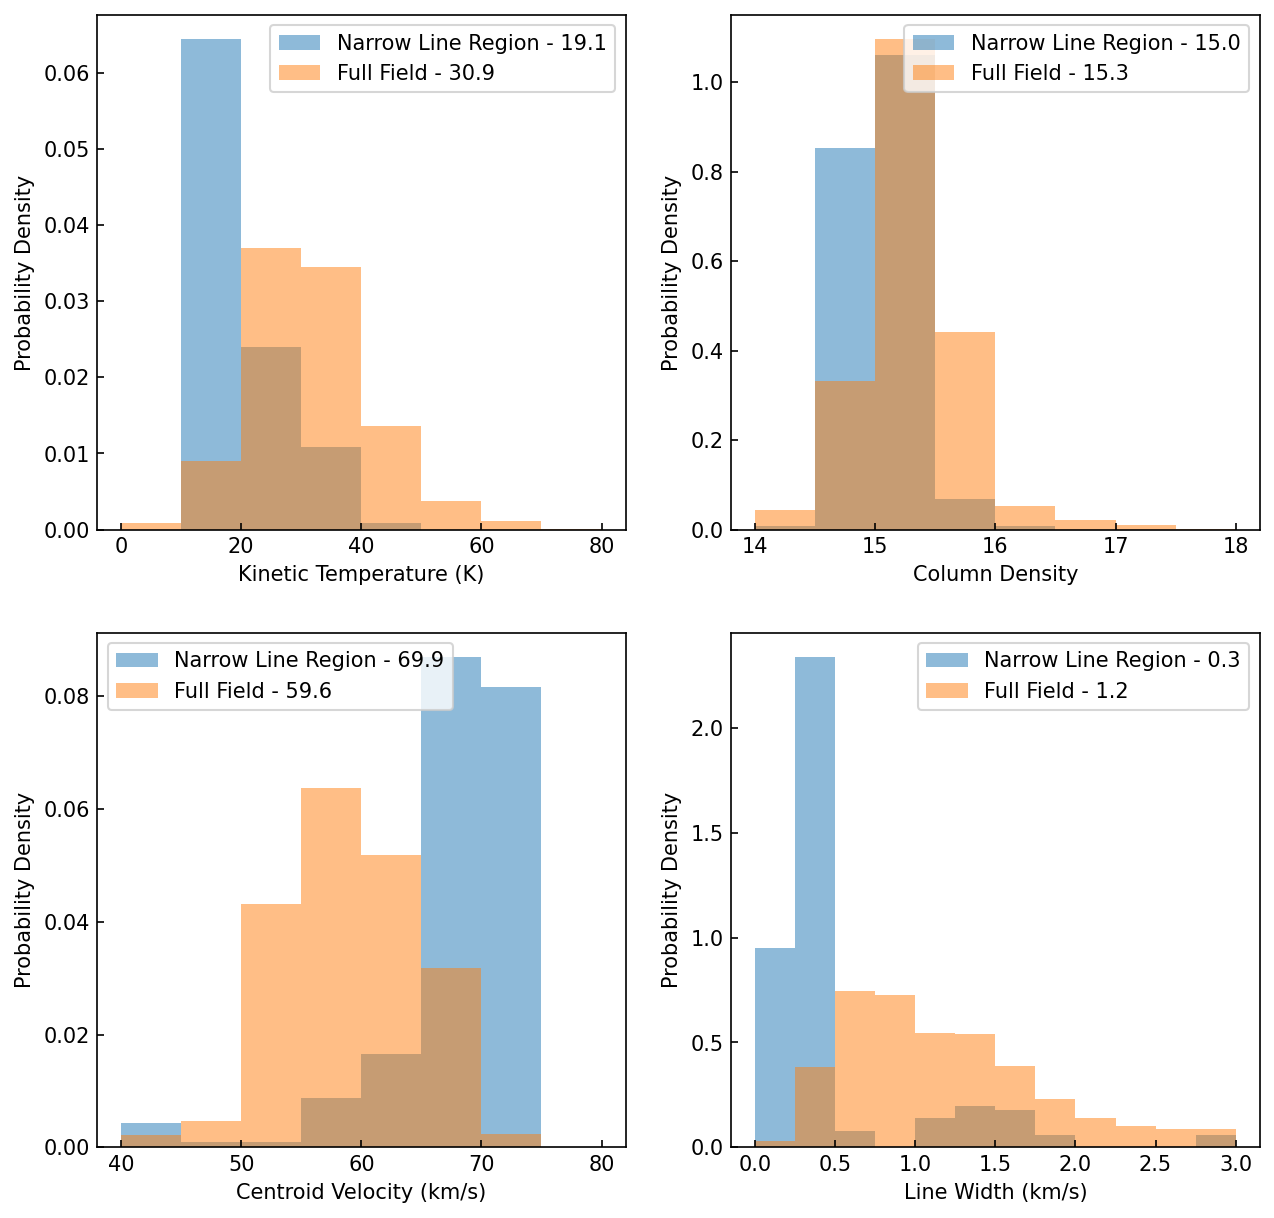

In [324]:
### EXCLUDING NARROW LINE REGION IN FULL FIELD ###
fig, ax = plt.subplots(2,2, figsize=(10,10), dpi=150)


## TKIN ###
bins = np.linspace(0,80,9)
data = par_map[0].data[0][mask]
data = data[np.isfinite(data)]
full_field = par_map[0].data[0][z == False]
full_field = full_field[np.isfinite(full_field)]
ax[0,0].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[0,0].hist(full_field, bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(full_field),1)))
ax[0,0].set_xlabel('Kinetic Temperature (K)')
ax[0,0].set_ylabel('Probability Density')
ax[0,0].tick_params(direction='in', which='both')
ax[0,0].legend()

## COLUMN DENSITY ###
bins = np.linspace(14,18,9)
data = par_map[0].data[2][mask]
data = data[np.isfinite(data)]
full_field = par_map[0].data[2][z == False]
full_field = full_field[np.isfinite(full_field)]
ax[0,1].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[0,1].hist(full_field, bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(full_field),1)))
ax[0,1].set_xlabel('Column Density')
ax[0,1].set_ylabel('Probability Density')
ax[0,1].tick_params(direction='in', which='both')
ax[0,1].legend()

## VELOCITY (CENTROID) ###
bins = np.linspace(40,80,9)
data = par_map[0].data[4][mask]
data = data[np.isfinite(data)]
full_field = par_map[0].data[4][z == False]
full_field = full_field[np.isfinite(full_field)]
ax[1,0].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[1,0].hist(full_field, bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(full_field),1)))
ax[1,0].set_xlabel('Centroid Velocity (km/s)')
ax[1,0].set_ylabel('Probability Density')
ax[1,0].tick_params(direction='in', which='both')
ax[1,0].legend()

## LINE WIDTH ###
bins = np.linspace(0,3,13)
data = par_map[0].data[3][mask]
data = data[np.isfinite(data)]
full_field = par_map[0].data[3][z == False]
full_field = full_field[np.isfinite(full_field)]
ax[1,1].hist(data, bins=bins, density=True, alpha=0.5, label='Narrow Line Region - ' + str(np.around(np.nanmedian(data),1)))
ax[1,1].hist(full_field, bins=bins, density=True, alpha=0.5, label='Full Field - '+str(np.around(np.nanmedian(full_field),1)))
ax[1,1].set_xlabel('Line Width (km/s)')
ax[1,1].set_ylabel('Probability Density')
ax[1,1].tick_params(direction='in', which='both')
ax[1,1].legend()

#plt.savefig('/Users/josh/GitHub/W51/fig_products/narrow_line_4panel_stats.pdf', bbox_inches='tight')